<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Prelim/Exercise%202.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**EXERCISE NO. 2.2** | **Linear Regression using sklearn**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 9/12/2024
**Date Submitted**: | 9/12/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
path = '/content/fuel.csv'
df = pd.read_csv(path)
df

,Temperature,Pressure,Fuel Rate
0,271.8,40.55,16.66
1,264.0,36.19,16.46
2,238.8,37.31,17.66
3,230.7,32.52,17.50
4,251.6,33.71,16.40
5,257.9,34.14,16.28
6,263.9,34.85,16.06


In [ ]:
df.corr()
# It can be seen that the highest correlation is between temperature and fuel rate

,Temperature,Pressure,Fuel Rate
Temperature,1.000000,0.549474,-0.795493
Pressure,0.549474,1.000000,0.049729
Fuel Rate,-0.795493,0.049729,1.000000


In [ ]:
x = df['Pressure']
y = df['Fuel Rate']

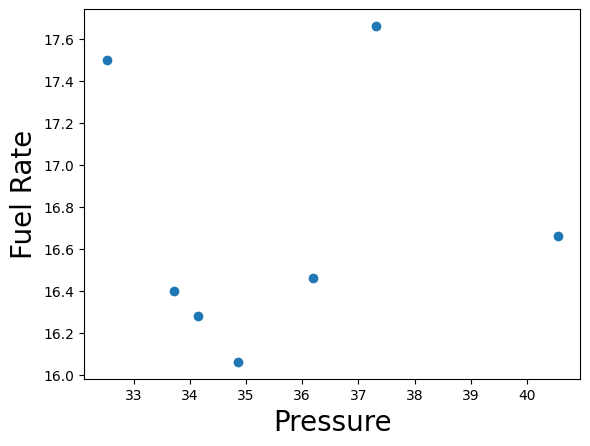

In [ ]:
plt.scatter(x,y)
plt.xlabel('Pressure',fontsize=20)
plt.ylabel('Fuel Rate',fontsize=20)
plt.show()

In [ ]:
x_matrix = x.values.reshape(-1,1)

In [ ]:
# Perform Univariate
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [ ]:
reg.intercept_

16.310537011522012

In [ ]:
reg.coef_

array([0.01141831])

In [ ]:
reg.predict(x_matrix)

array([16.77354928, 16.72376547, 16.73655398, 16.68186029, 16.69544808,
       16.70035795, 16.70846495])

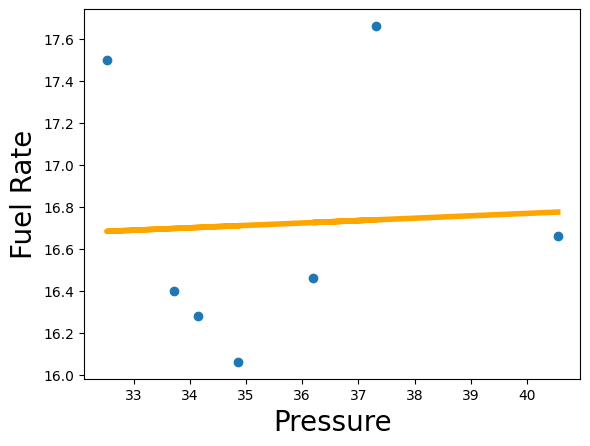

In [ ]:
plt.scatter(x,y)
yhat = x*0.01141831+16.310537011522012
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Pressure', fontsize = 20)
plt.ylabel('Fuel Rate', fontsize = 20)
plt.show()

In [ ]:
# Comparing with statsmodel
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fuel Rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.197
Method:                 Least Squares   F-statistic:                   0.01240
Date:                Thu, 12 Sep 2024   Prob (F-statistic):              0.916
Time:                        11:02:55   Log-Likelihood:                -6.0204
No. Observations:                   7   AIC:                             16.04
Df Residuals:                       5   BIC:                             15.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3105      3.661      4.455      0.007       6.900      25.721
Pressure       0.0114      0.103      0.111      0.916      -0.252       0.275
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.202
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.981
Skew:                           0.720   Prob(JB):                        0.612
Kurtosis:                       1.865   Cond. No.                         511.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Computing the R squared
reg.score(x_matrix,y)

0.002472999373821172

In [ ]:
# Computing MSE
y_prediction = reg.predict(x_matrix)
mean_square_error = mean_squared_error (y,y_prediction)
mean_square_error

0.32700970849915195

In [ ]:
# Computing RMSE
np.sqrt(mean_square_error)

0.5718476269944223